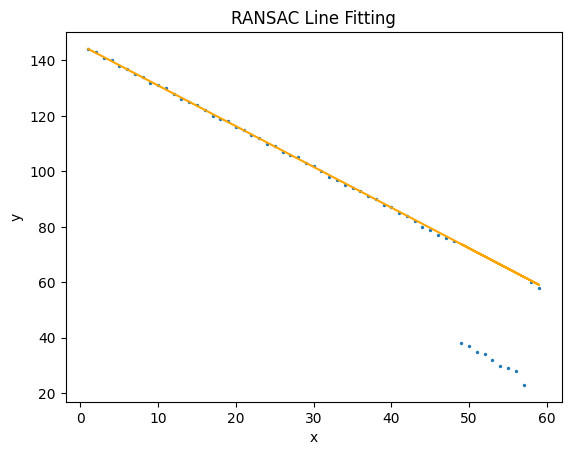

Estimated Roof Angle Using RANSAC: -55.71 degrees


In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 350 , 390)
indices = np.where(edges != [0])
if len(indices) == 0:
    print("No edges detected")
    exit()
    
x_list = []
y_list = []
for i in range(len(indices[1])):
    if indices[1][i] not in x_list and indices[0][i] not in y_list:
        x_list.append(indices[1][i])
        y_list.append(indices[0][i])

x = np.array(x_list)
y = np.array(y_list)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# RANSAC parameters
n_iterations = 1000
n_points = 2
threshold = 5

# Initializing variables for best line and inliers
best_line = None
max_inliers = 0

# Running RANSAC algorithm
for i in range(n_iterations):

    sample_indices = np.random.choice(len(x), size=n_points, replace=False)
    sample_x = x[sample_indices]
    sample_y = y[sample_indices]

    line = np.polyfit(sample_x, sample_y, 1)

    distances = np.abs(line[0]*x - y + line[1]) / np.sqrt(line[0]**2 + 1)

    inliers = np.sum(distances < threshold)

    if inliers > max_inliers:
        best_line = line
        max_inliers = inliers

#slope and intercept of the best line
m, c = best_line

# scatter plot and estimated RANSAC line
plt.figure()
plt.scatter(x, y, s=2)
plt.plot(x, m*x + c, color='orange', linewidth=1.5)
plt.title('RANSAC Line Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

roof_angle = np.arctan(m) * 180 / np.pi
print(f"Estimated Roof Angle Using RANSAC: {roof_angle:.2f} degrees")